
T = 3.538000


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


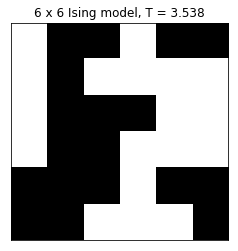

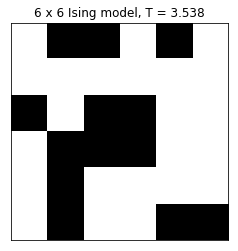

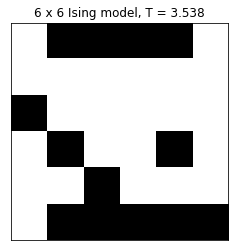

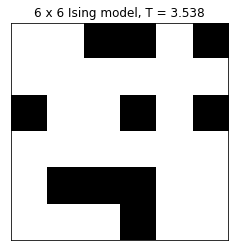

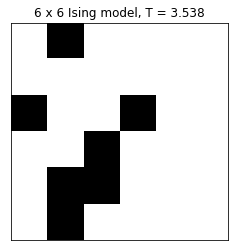

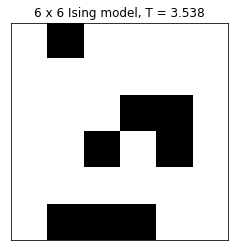

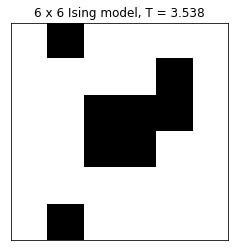

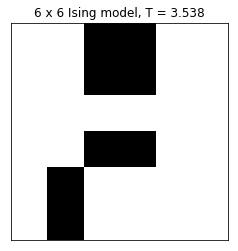

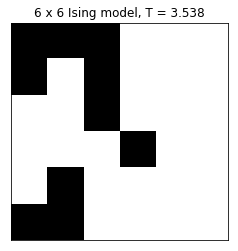

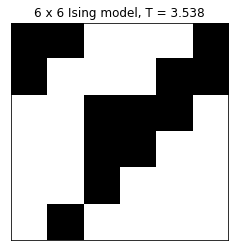

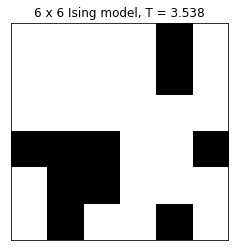

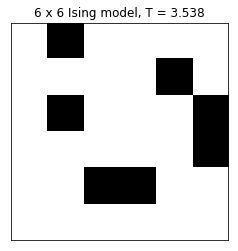

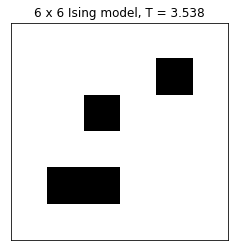

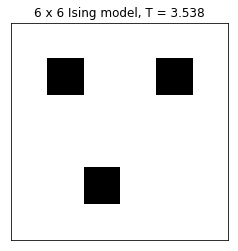

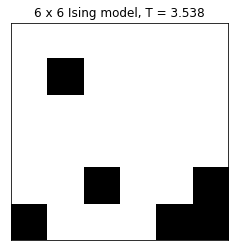

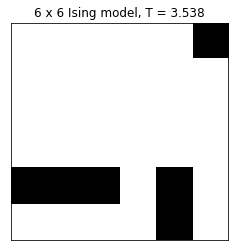

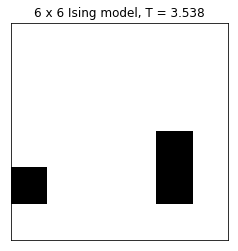

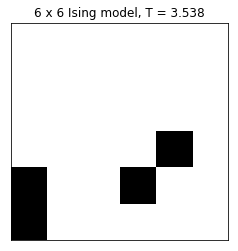

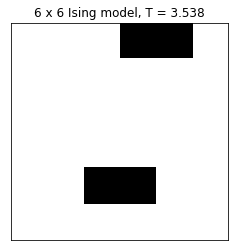

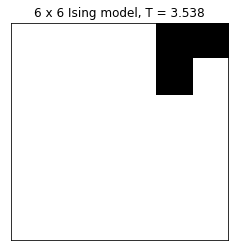

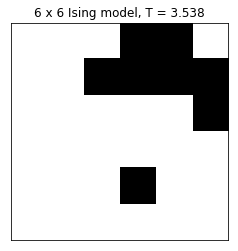

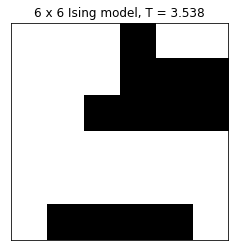

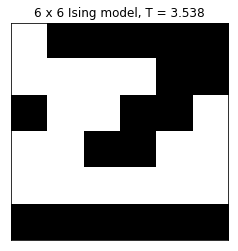

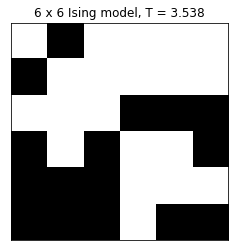

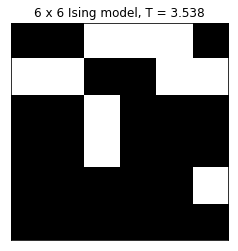

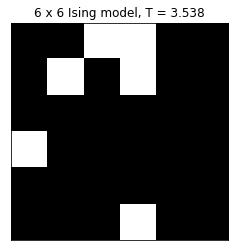

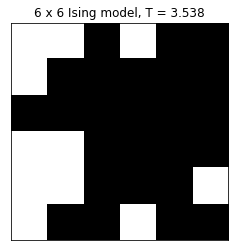

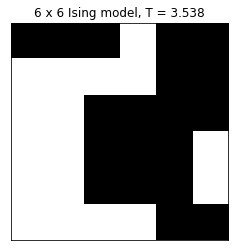

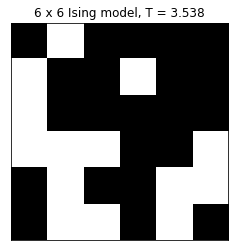

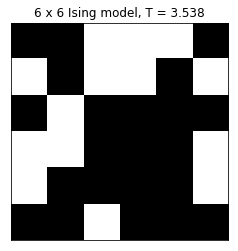

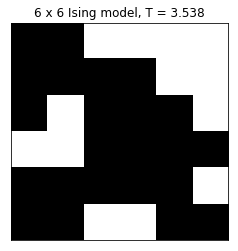

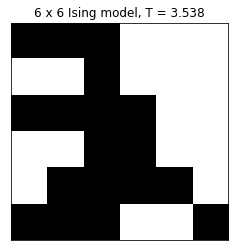

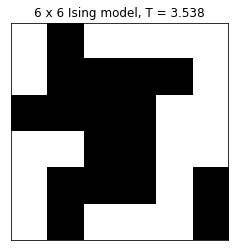

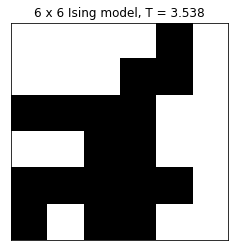

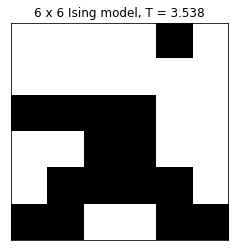

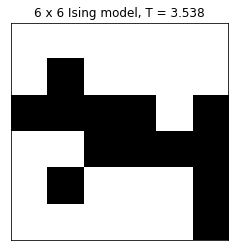

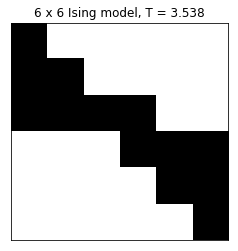

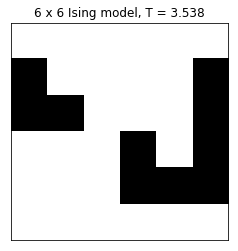

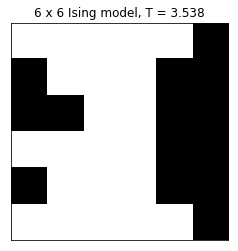

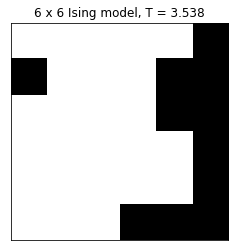

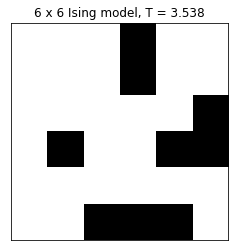

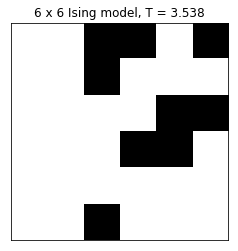

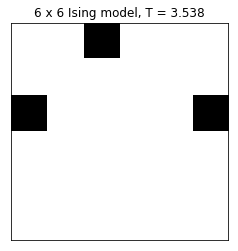

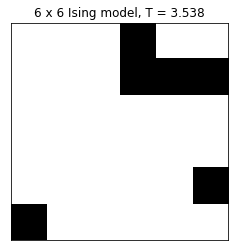

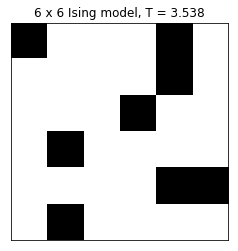

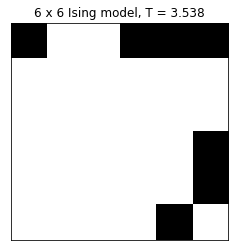

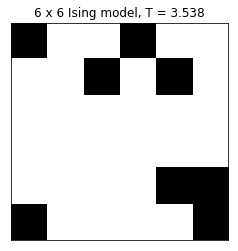

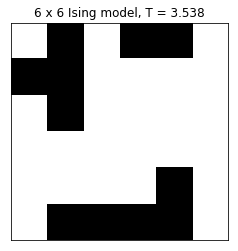

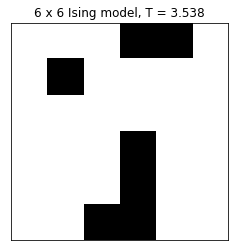

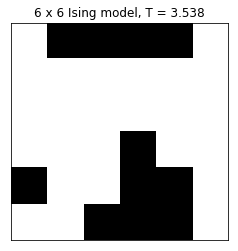


T = 3.256000


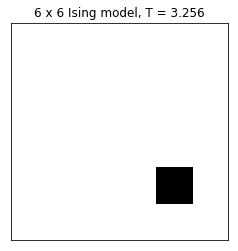

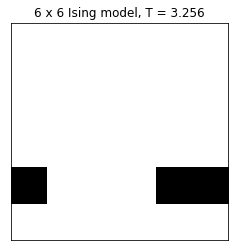

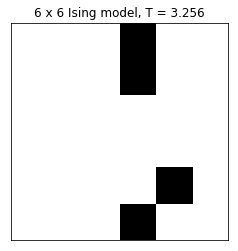

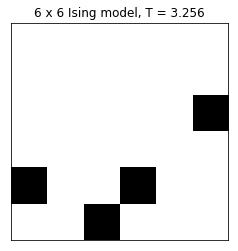

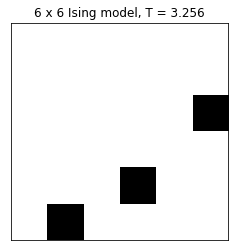

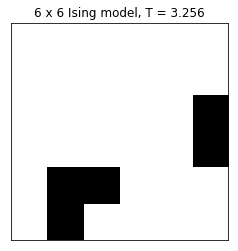

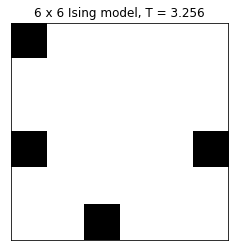

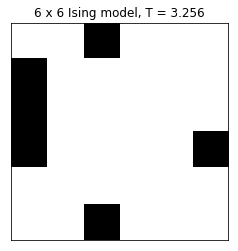

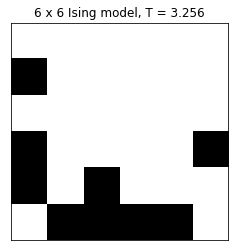

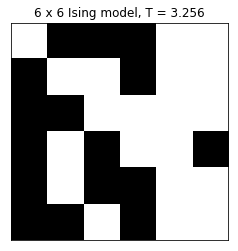

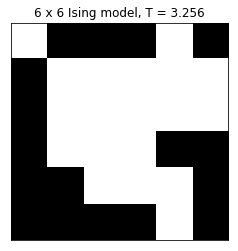

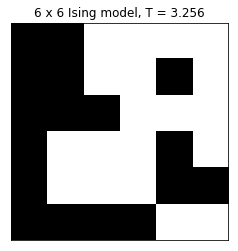

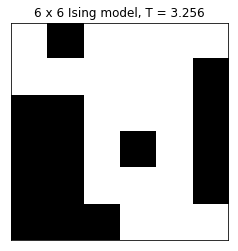

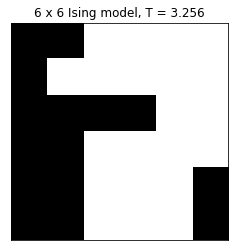

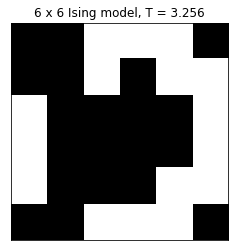

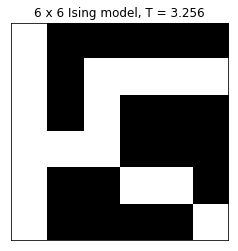

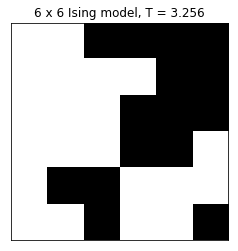

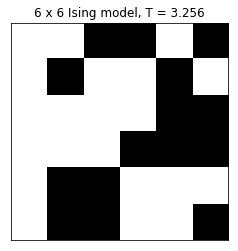

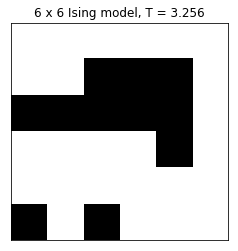

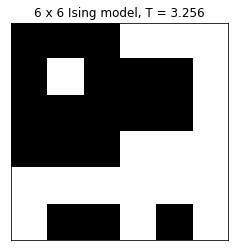

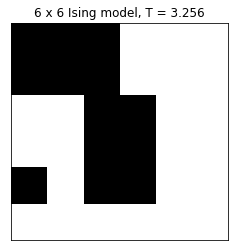

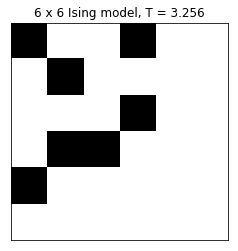

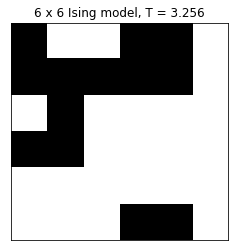

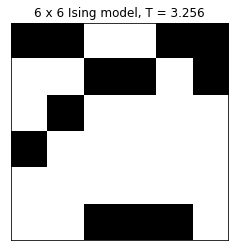

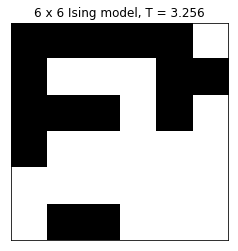

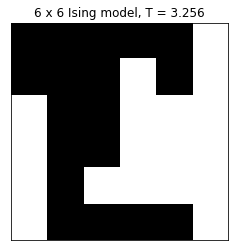

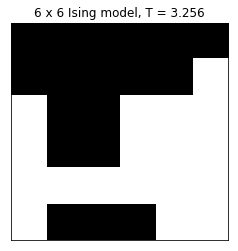

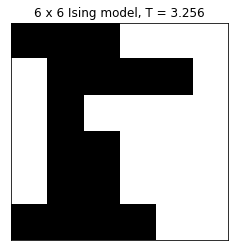

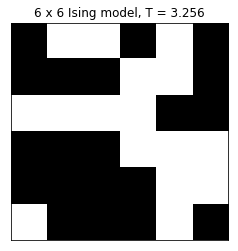

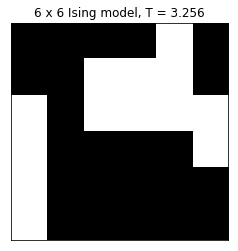

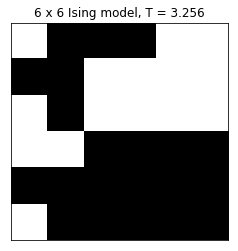

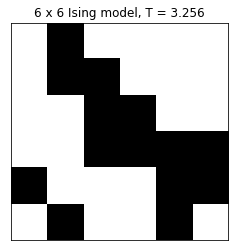

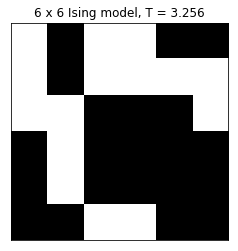

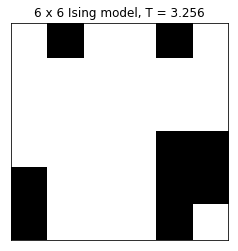

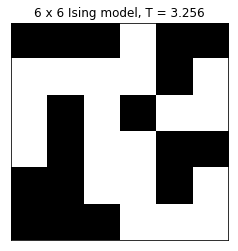

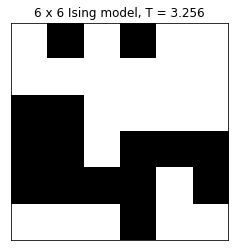

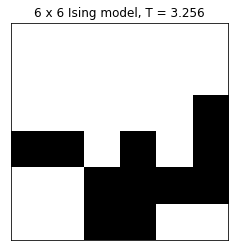

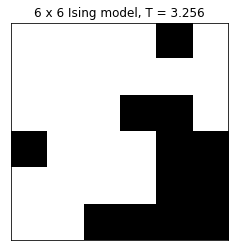

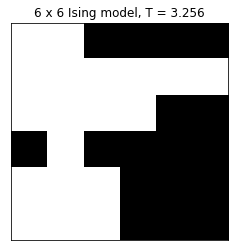

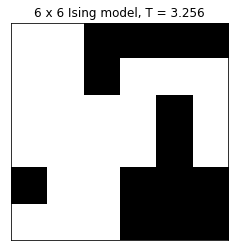

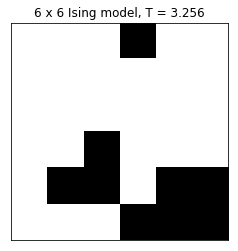

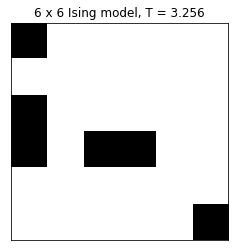

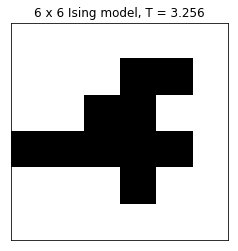

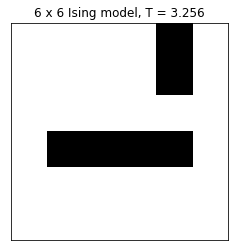

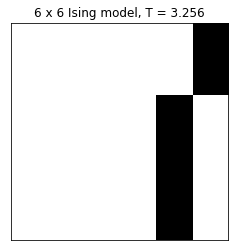

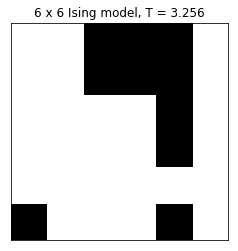

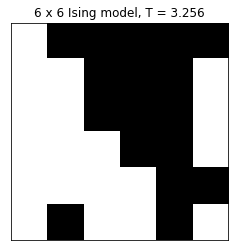

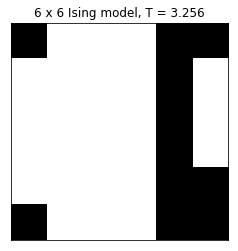

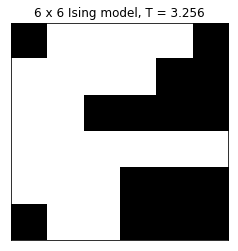

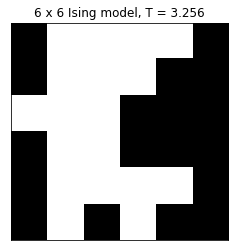


T = 2.974000


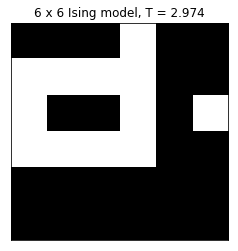

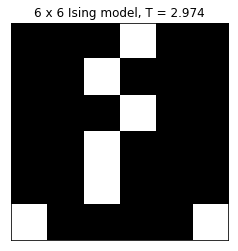

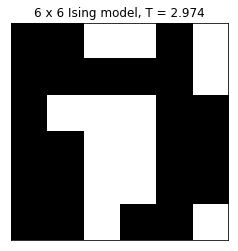

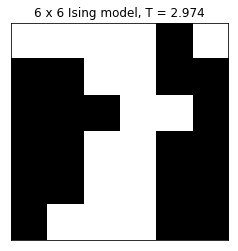

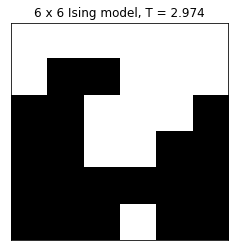

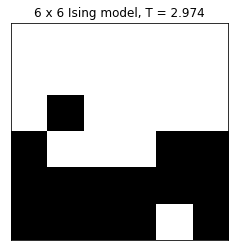

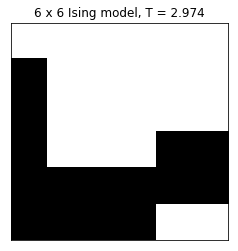

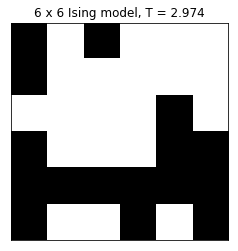

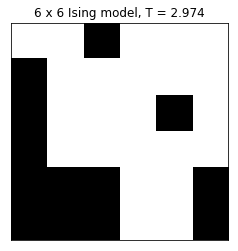

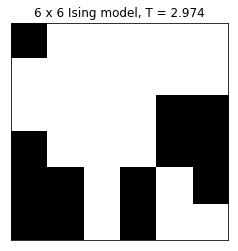

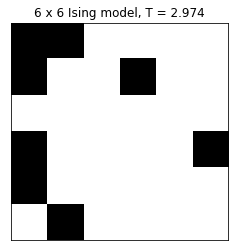

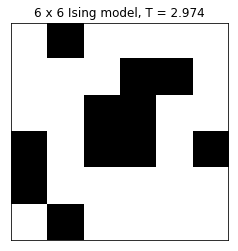

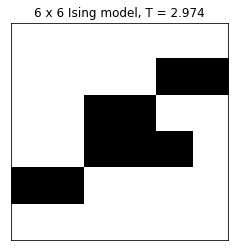

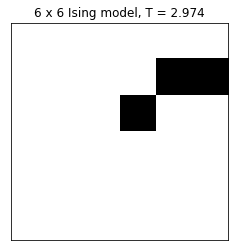

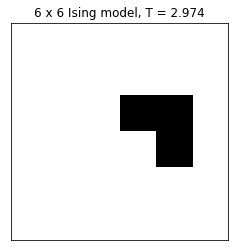

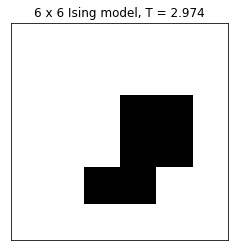

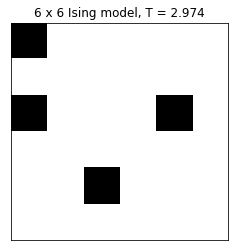

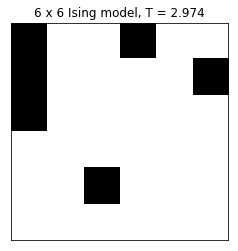

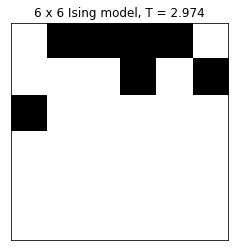

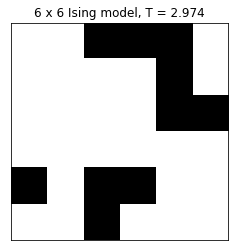

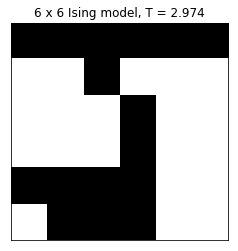

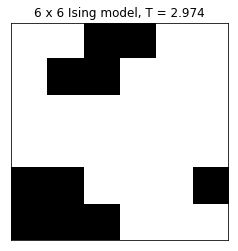

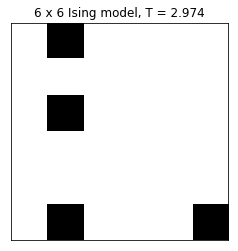

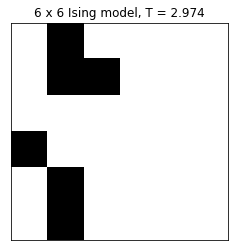

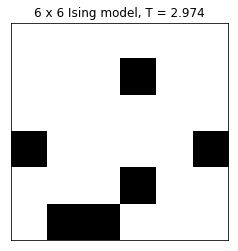

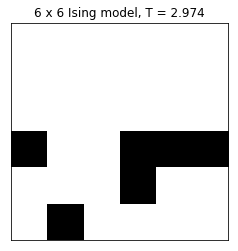

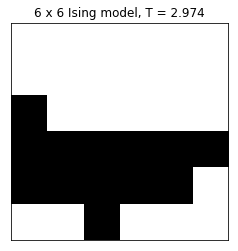

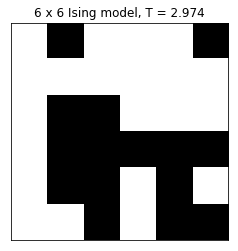

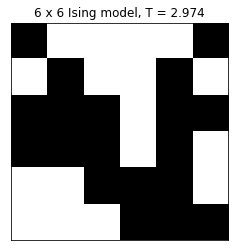

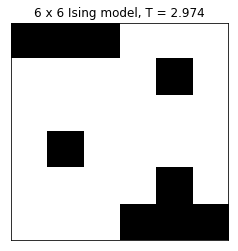

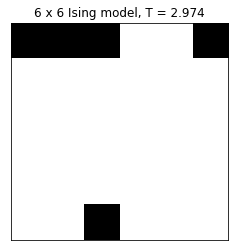

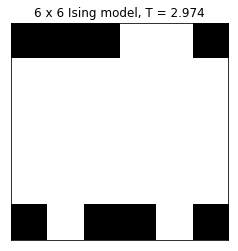

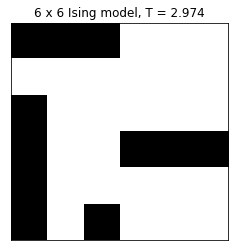

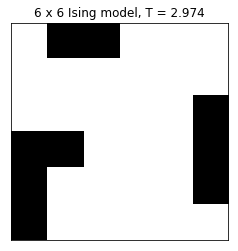

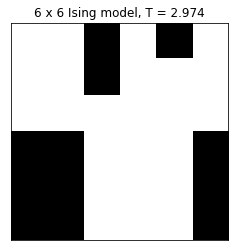

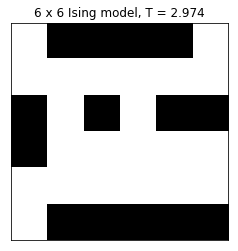

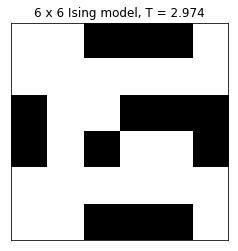

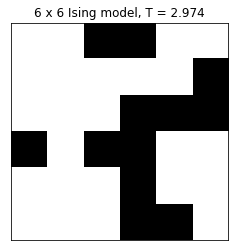

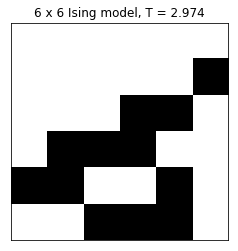

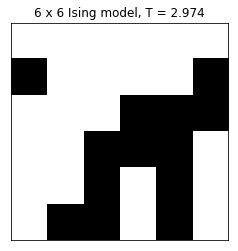

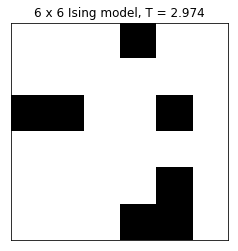

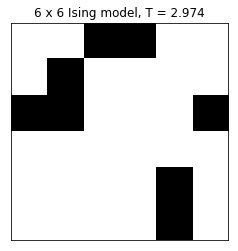

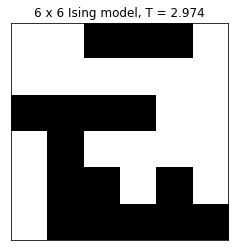

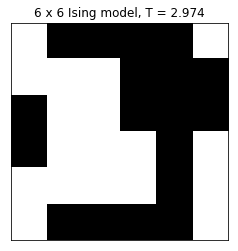

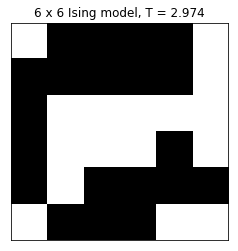

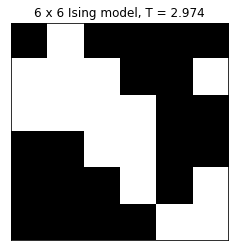

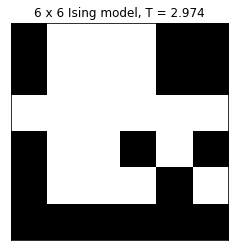

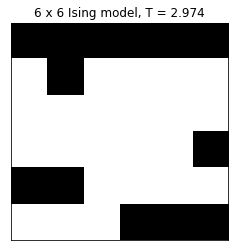

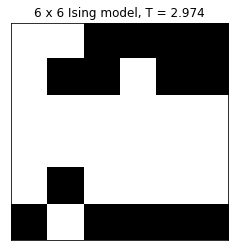

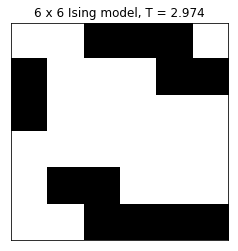


T = 2.692000


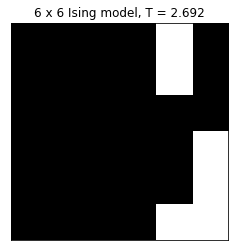

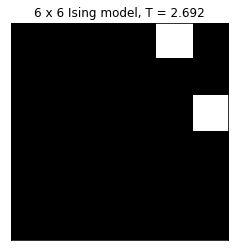

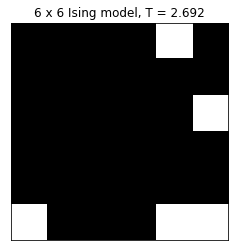

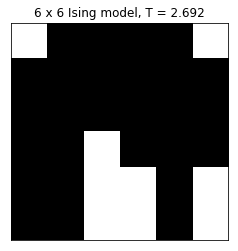

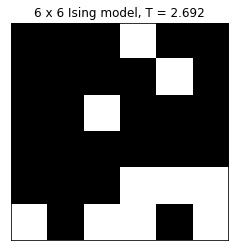

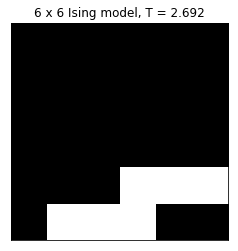

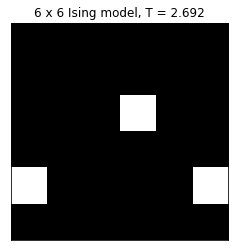

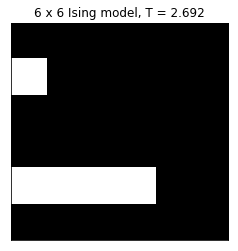

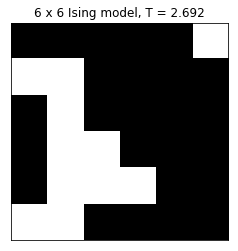

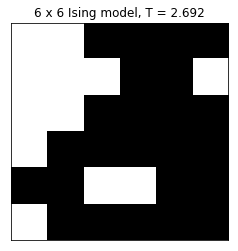

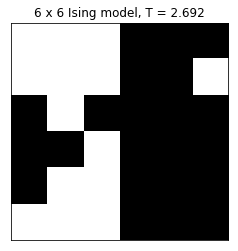

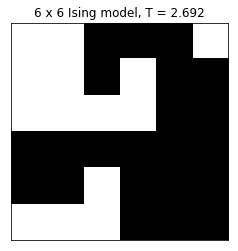

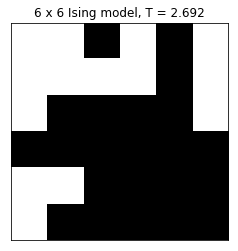

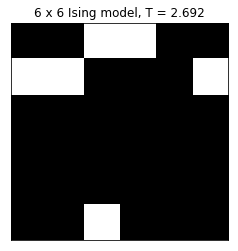

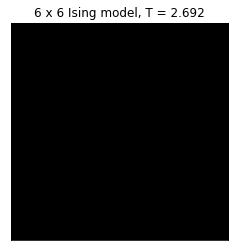

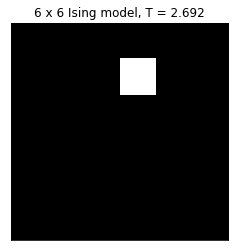

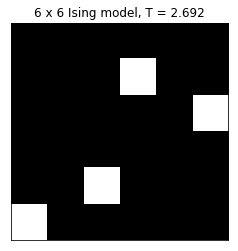

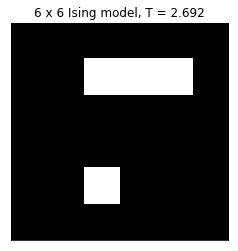

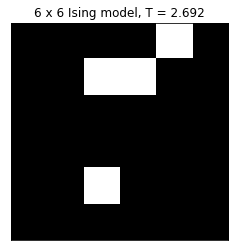

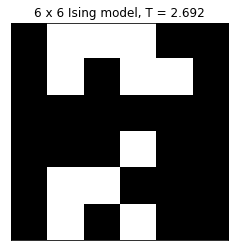

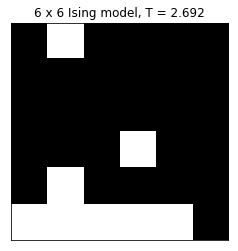

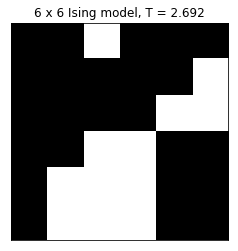

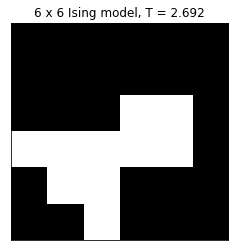

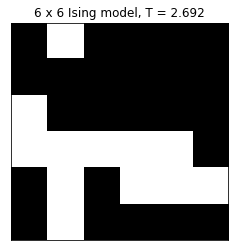

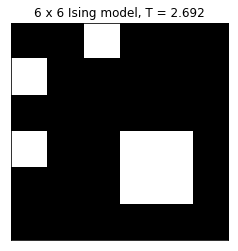

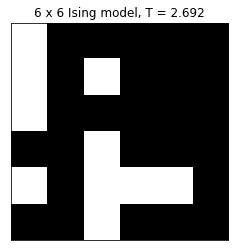

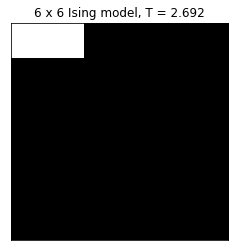

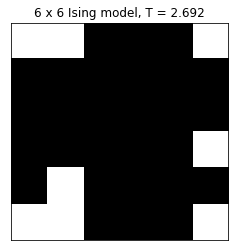

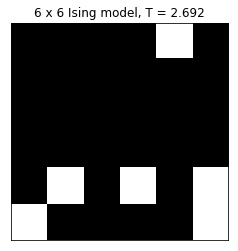

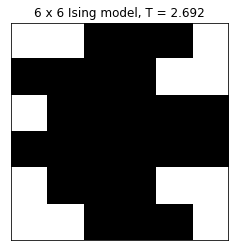

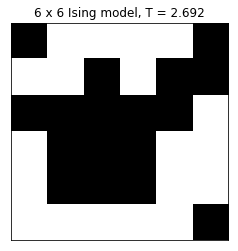

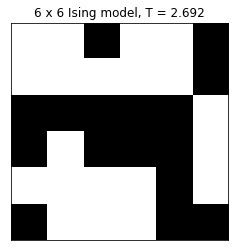

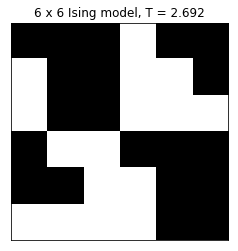

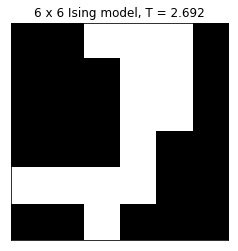

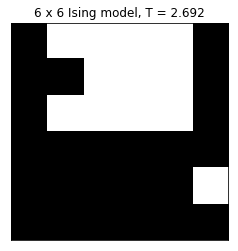

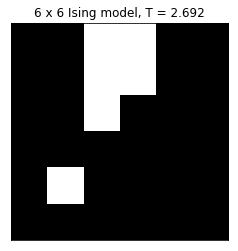

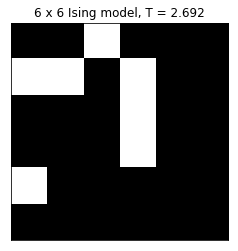

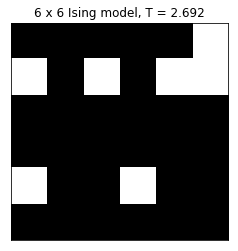

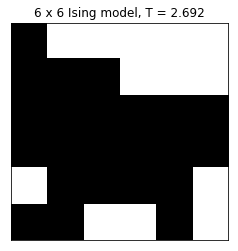

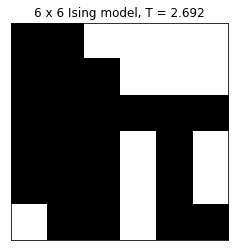

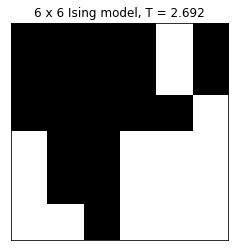

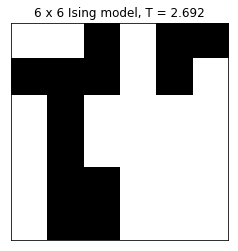

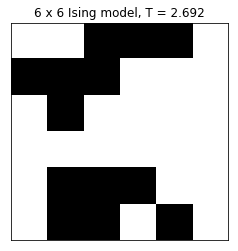

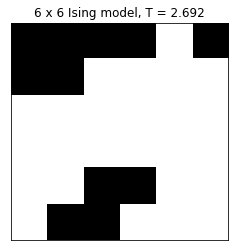

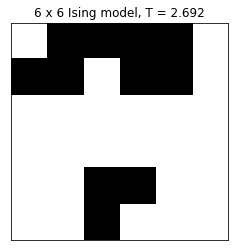

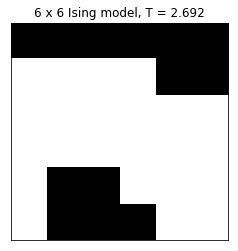

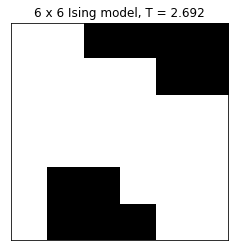

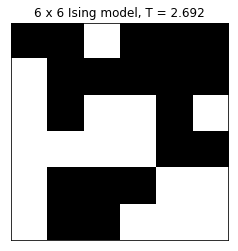

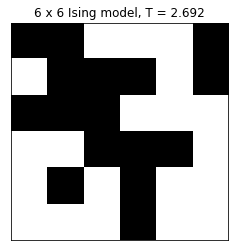

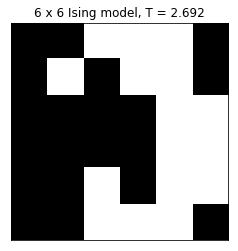


T = 2.410000


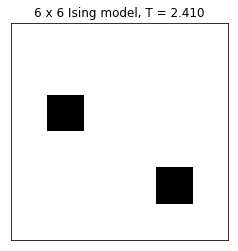

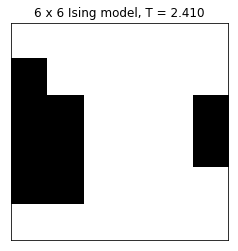

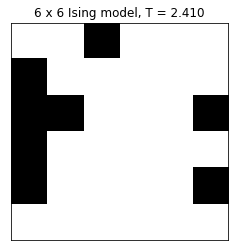

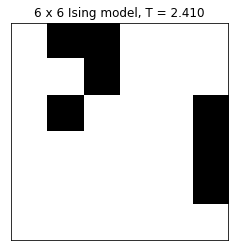

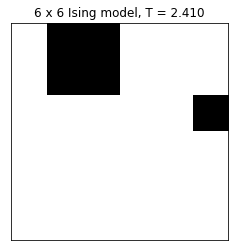

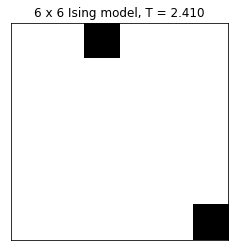

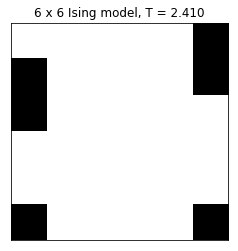

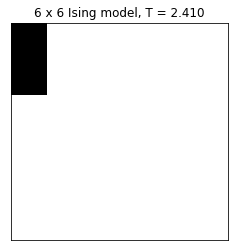

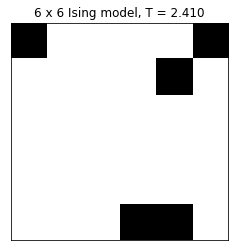

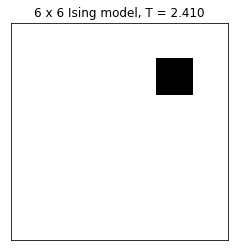

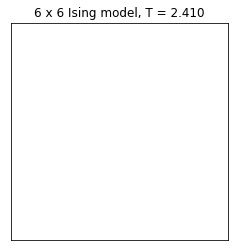

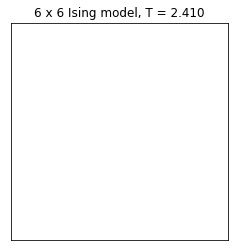

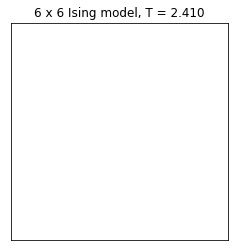

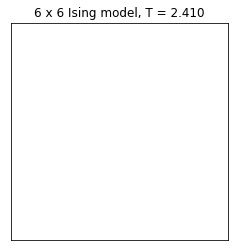

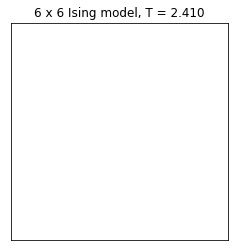

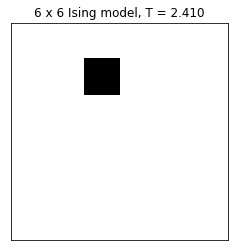

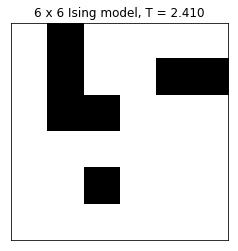

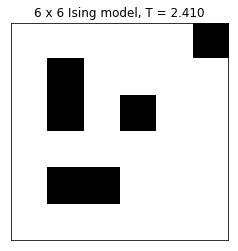

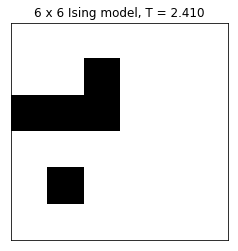

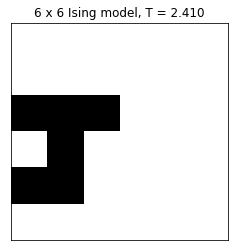

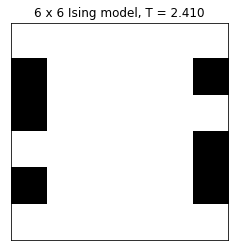

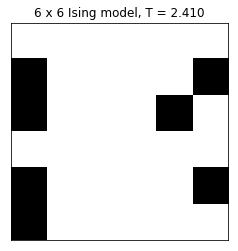

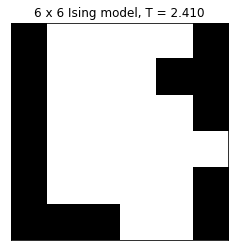

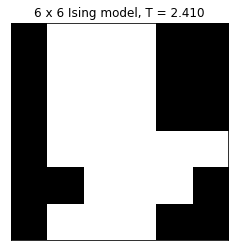

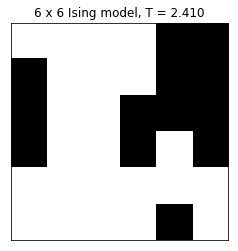

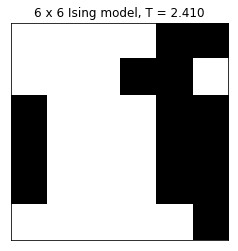

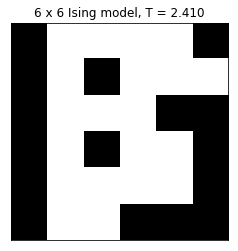

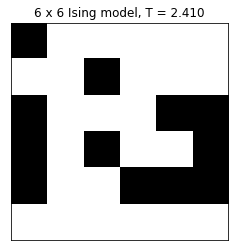

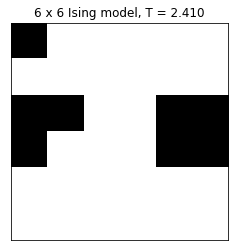

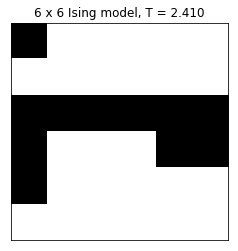

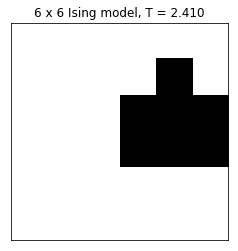

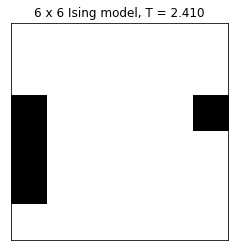

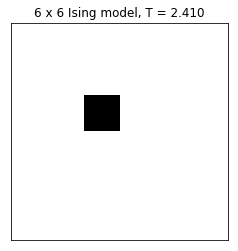

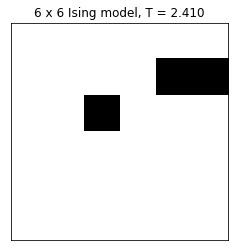

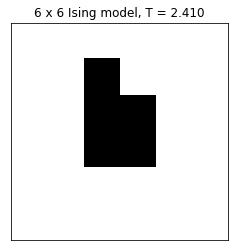

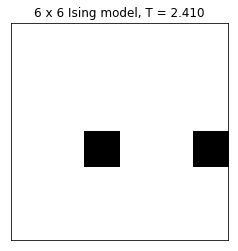

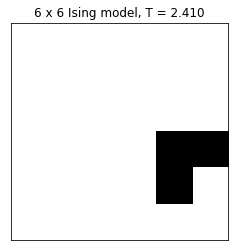

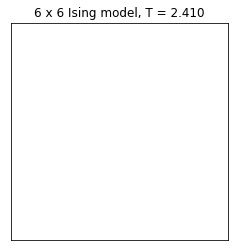

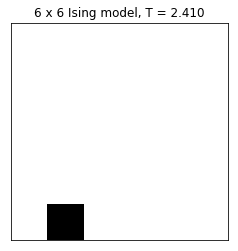

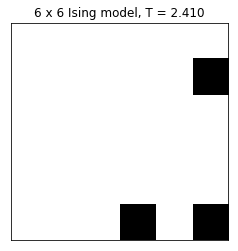

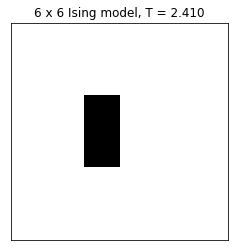

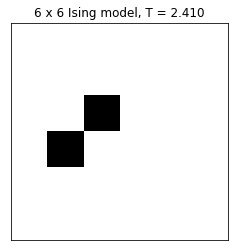

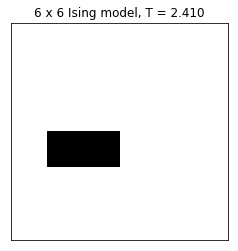

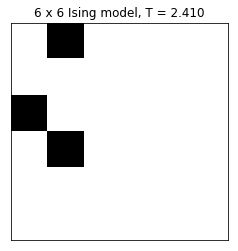

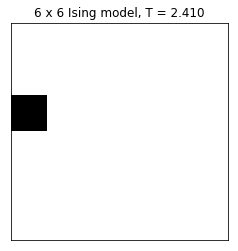

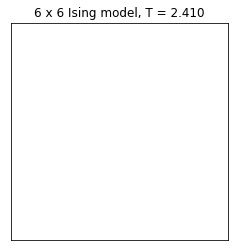

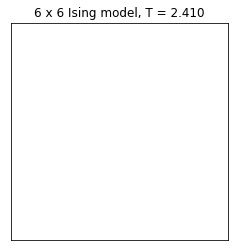

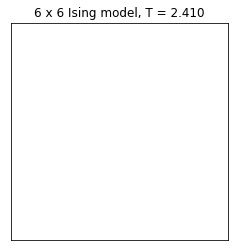

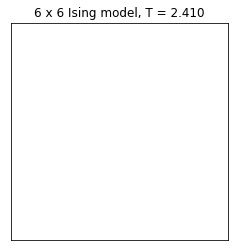

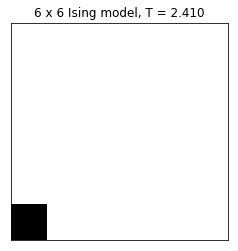


T = 2.128000


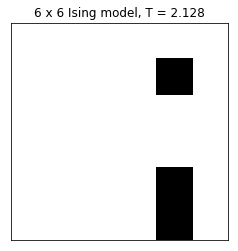

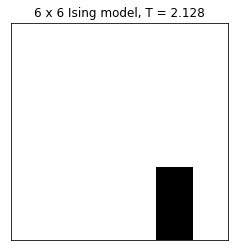

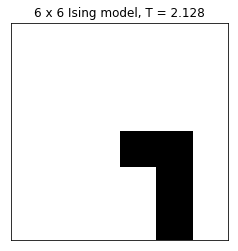

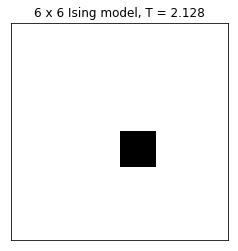

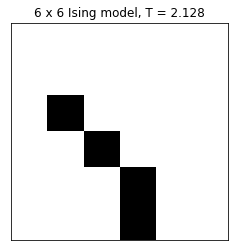

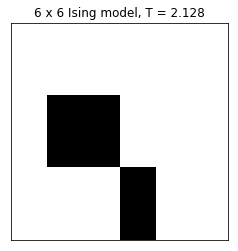

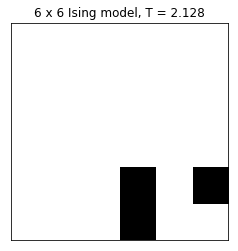

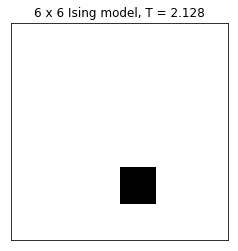

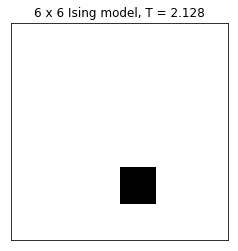

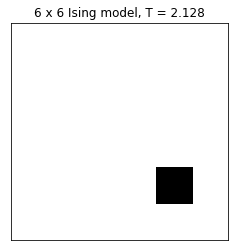

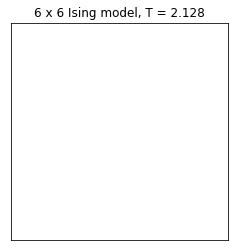

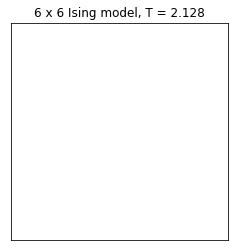

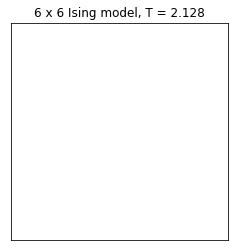

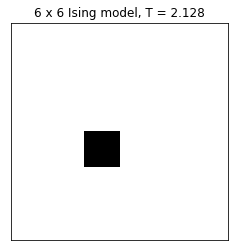

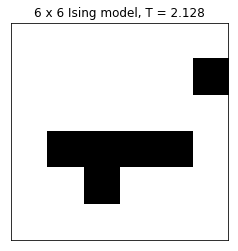

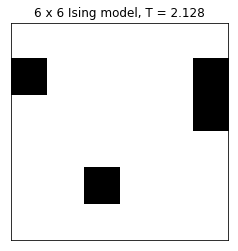

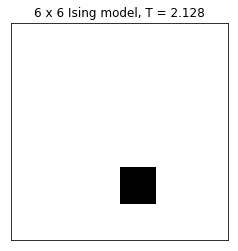

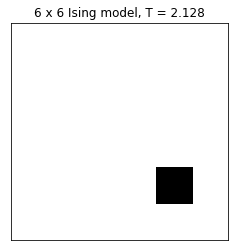

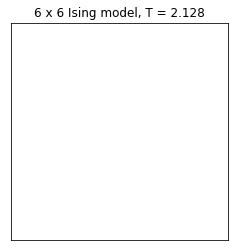

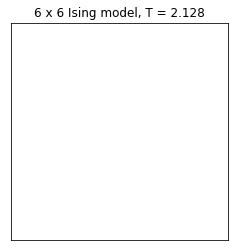

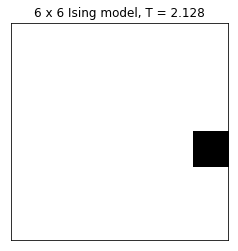

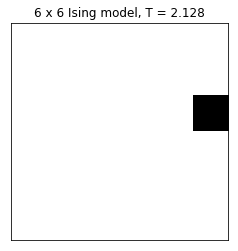

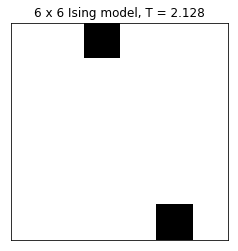

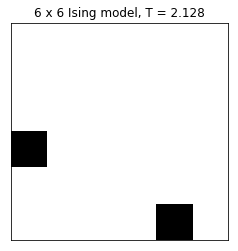

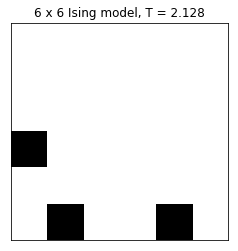

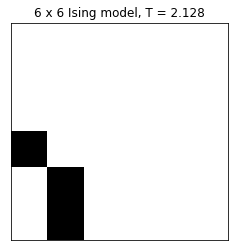

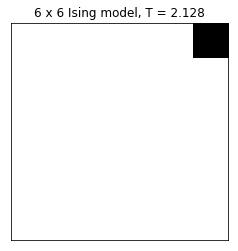

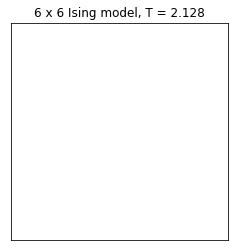

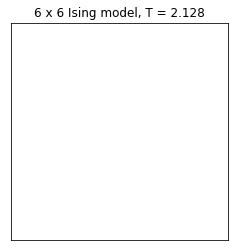

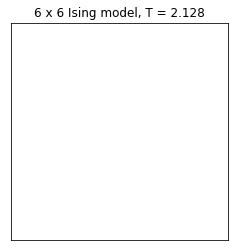

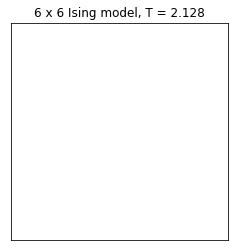

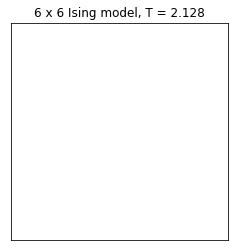

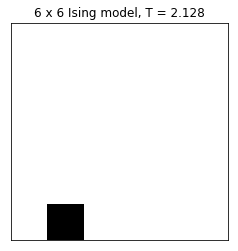

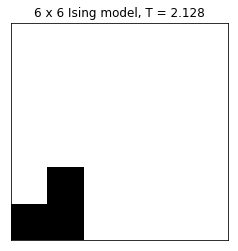

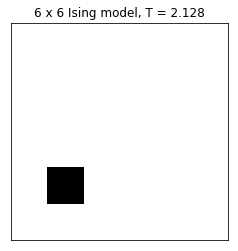

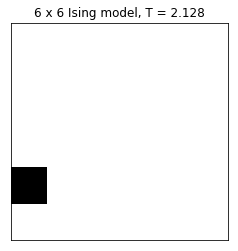

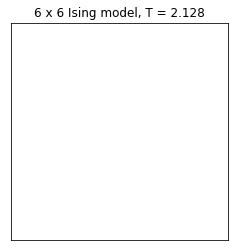

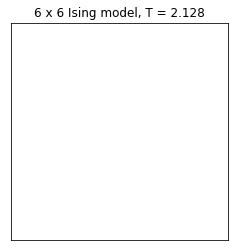

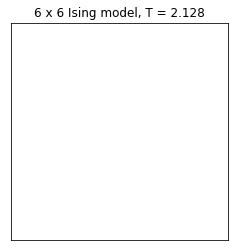

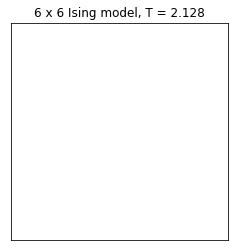

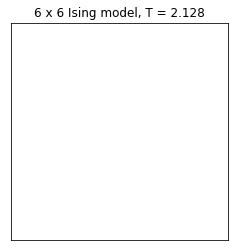

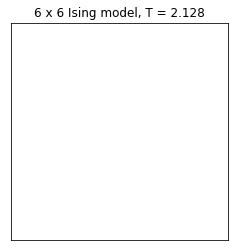

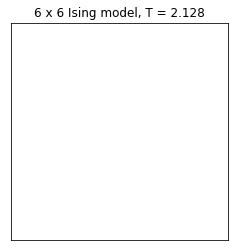

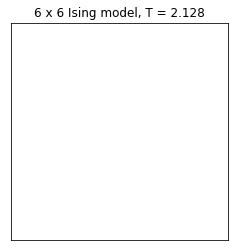

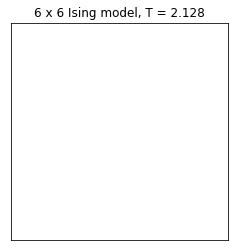

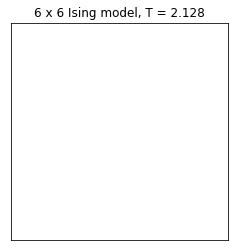

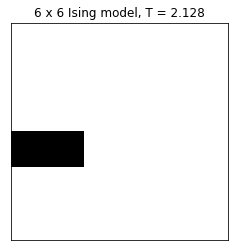

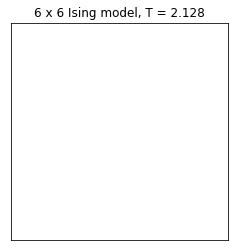

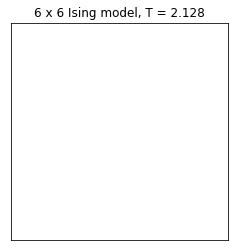

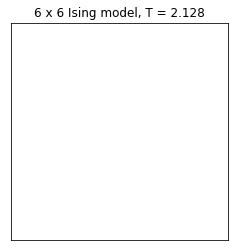


T = 1.846000


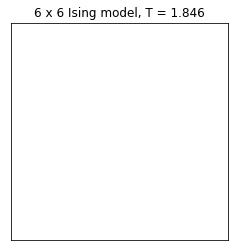

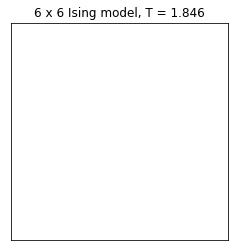

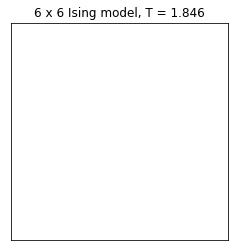

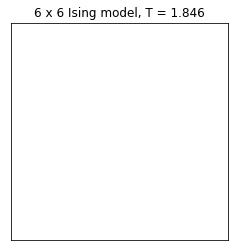

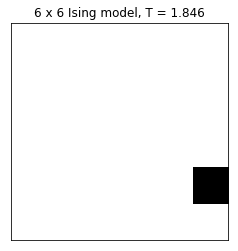

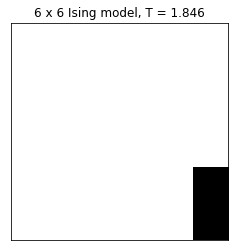

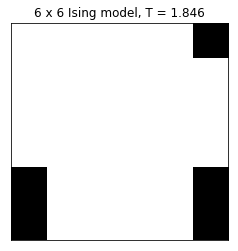

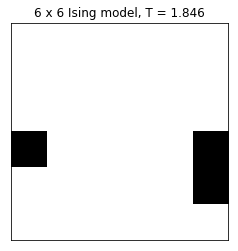

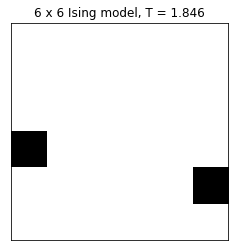

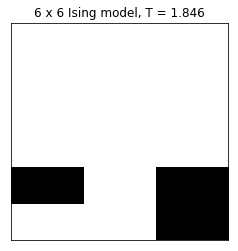

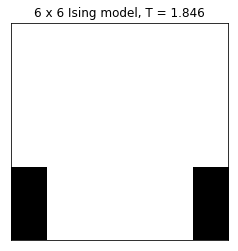

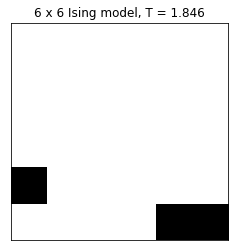

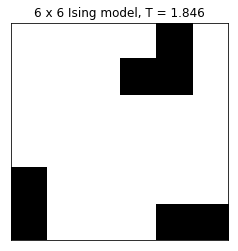

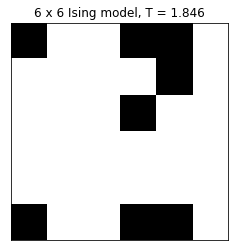

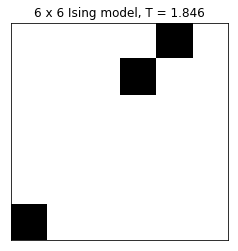

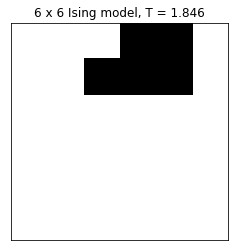

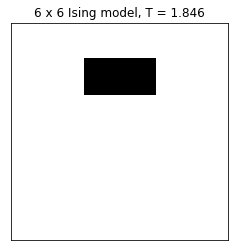

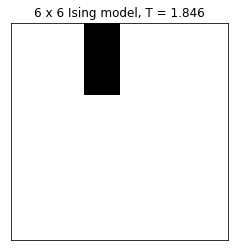

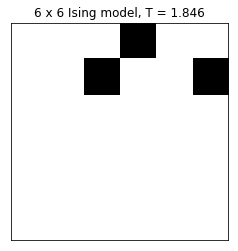

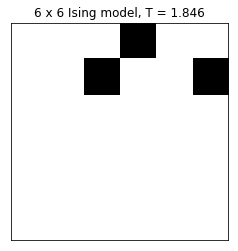

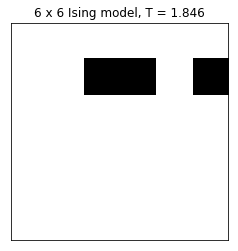

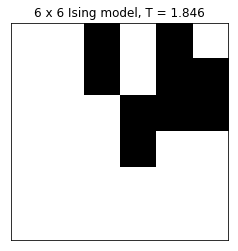

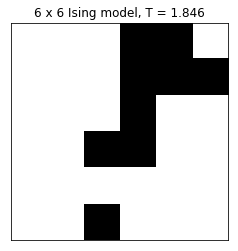

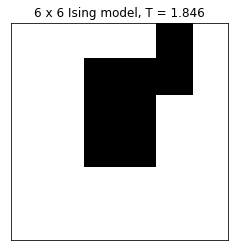

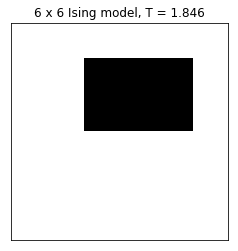

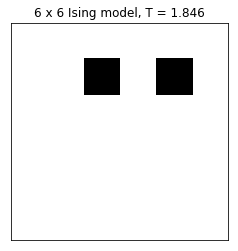

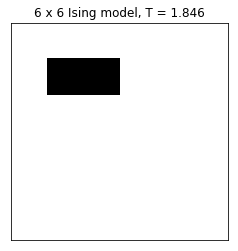

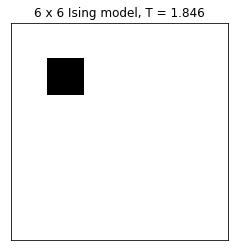

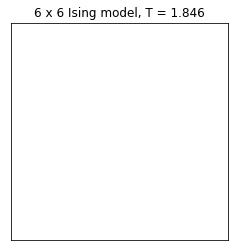

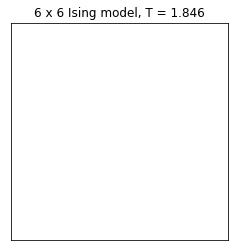

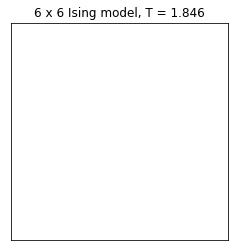

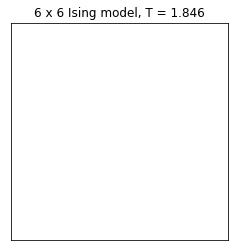

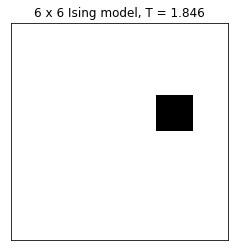

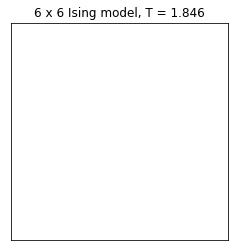

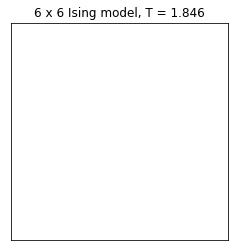

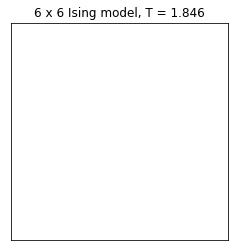

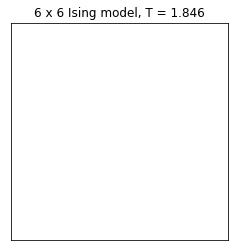

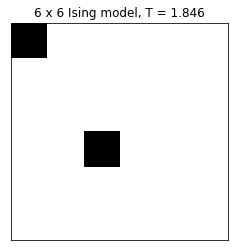

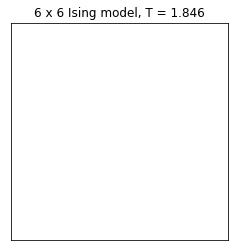

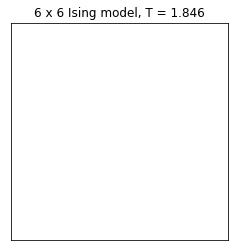

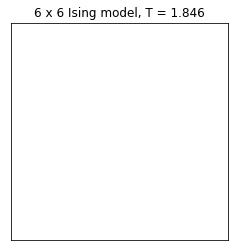

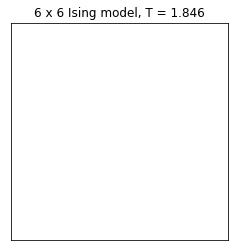

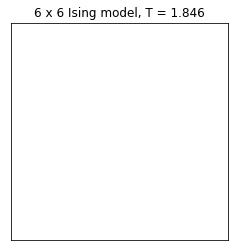

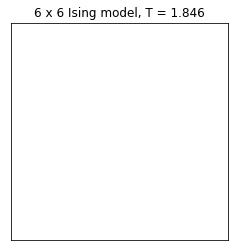

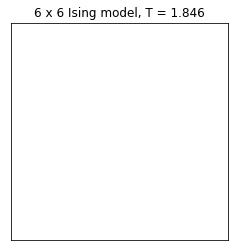

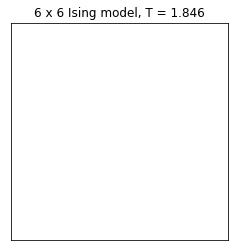

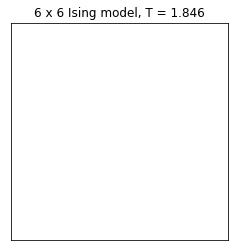

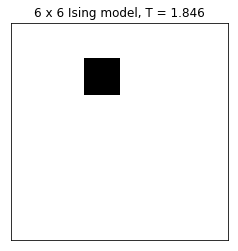

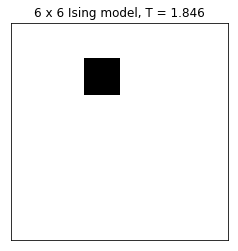

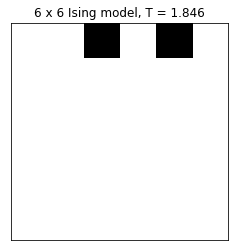


T = 1.564000


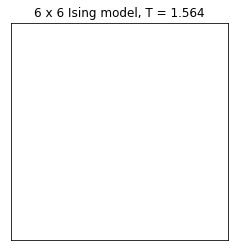

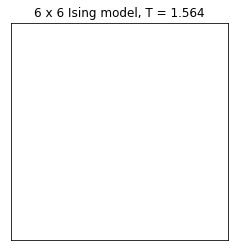

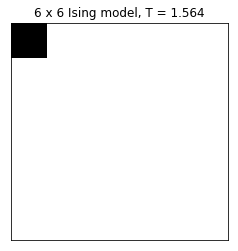

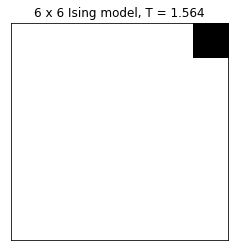

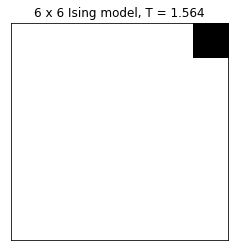

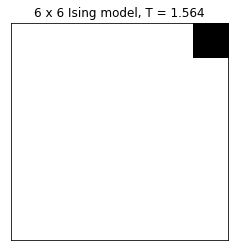

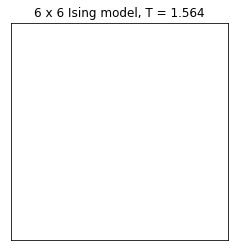

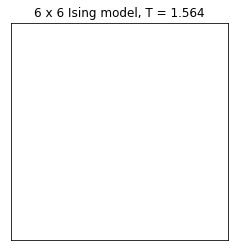

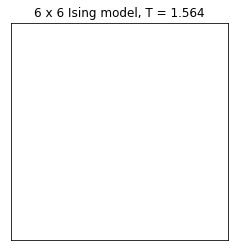

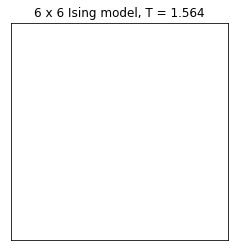

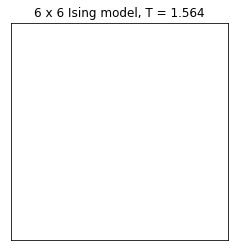

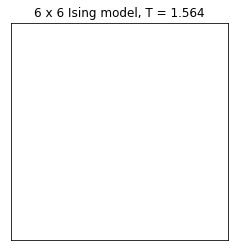

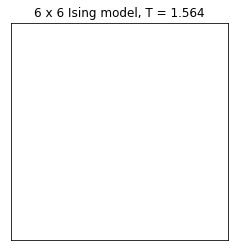

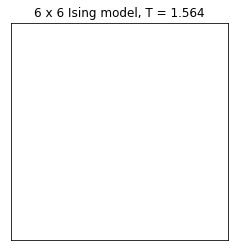

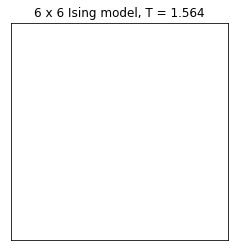

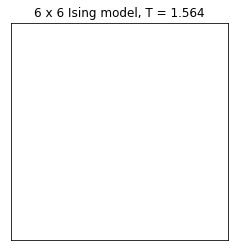

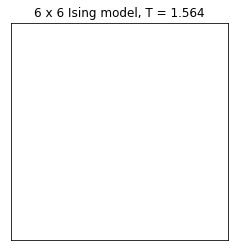

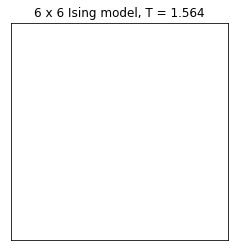

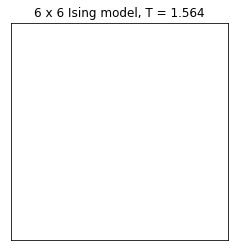

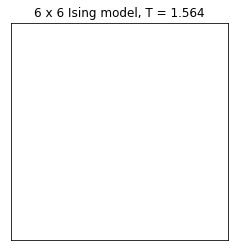

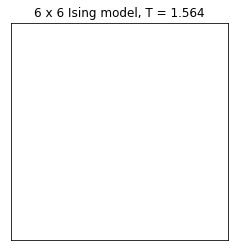

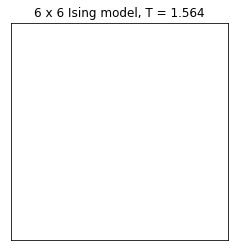

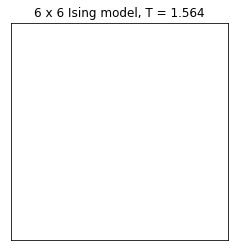

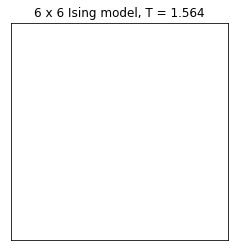

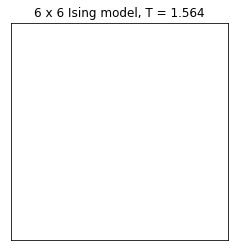

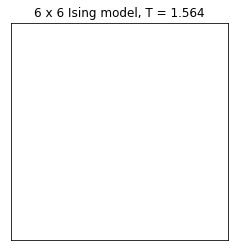

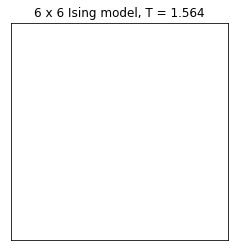

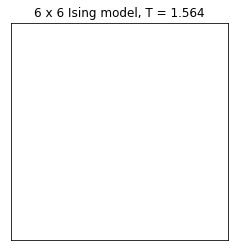

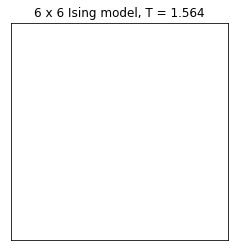

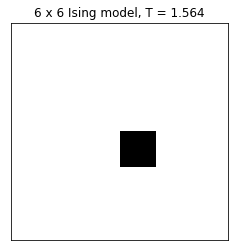

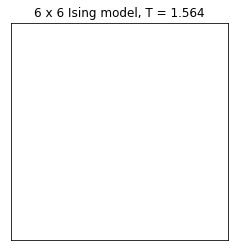

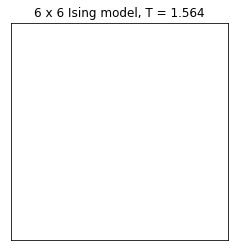

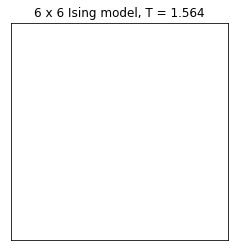

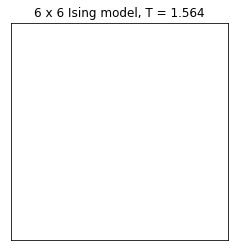

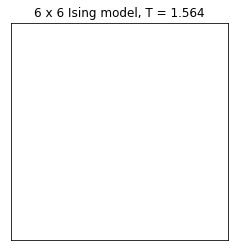

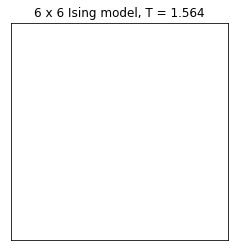

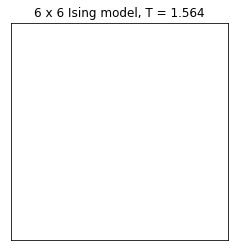

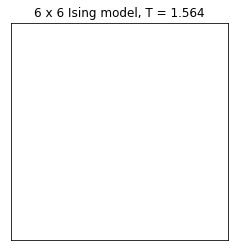

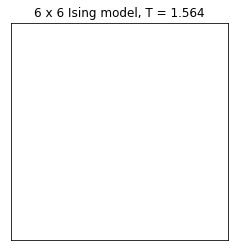

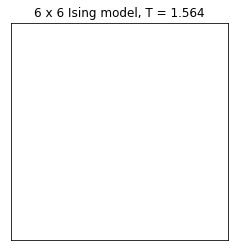

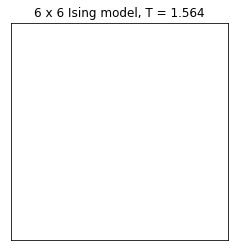

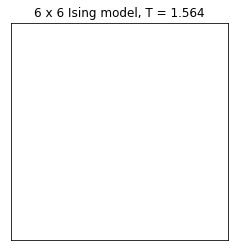

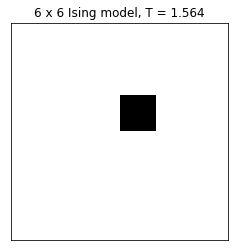

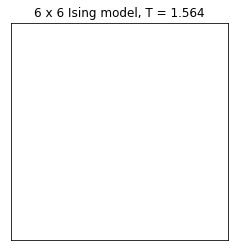

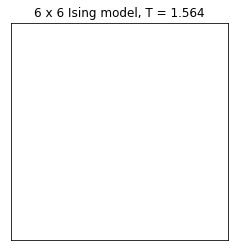

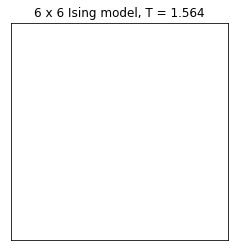

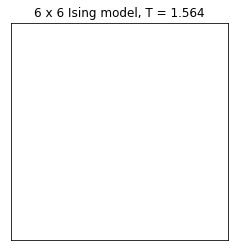

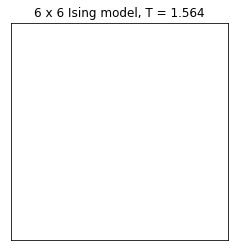

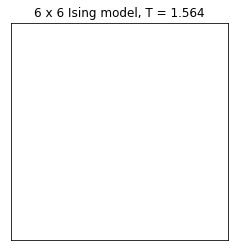

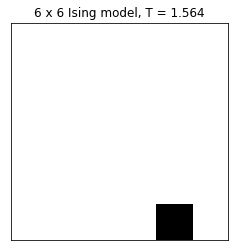


T = 1.282000


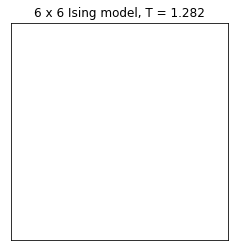

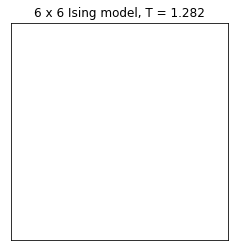

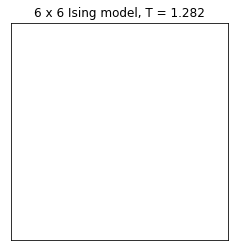

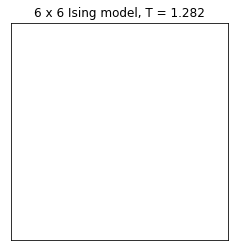

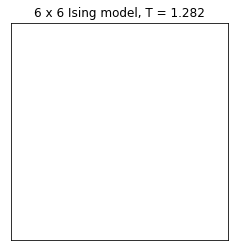

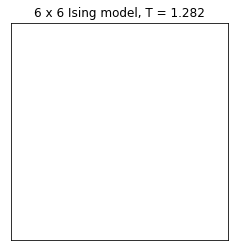

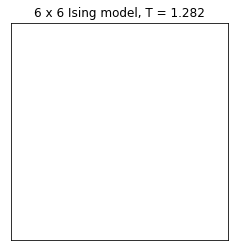

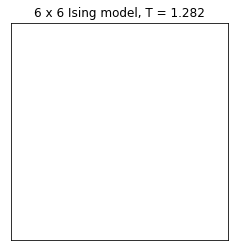

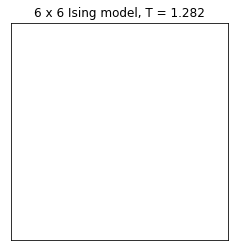

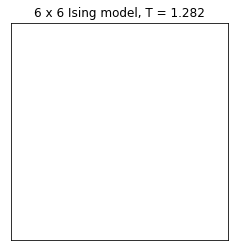

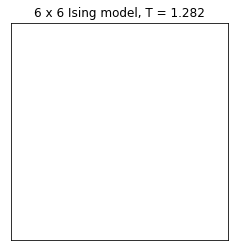

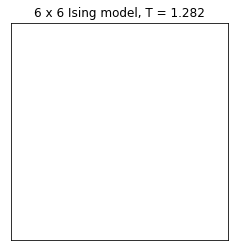

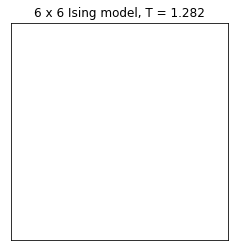

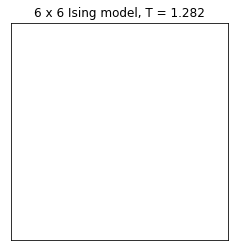

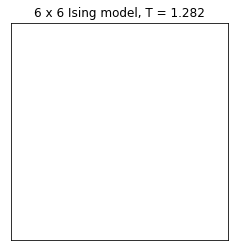

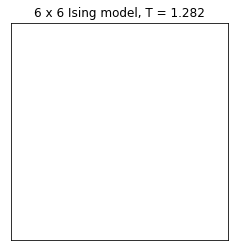

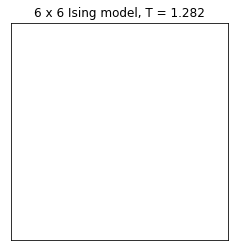

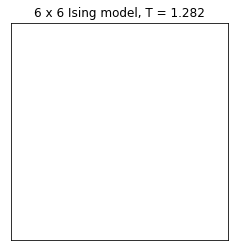

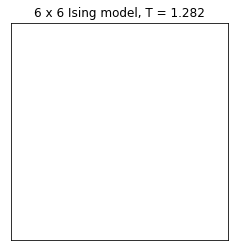

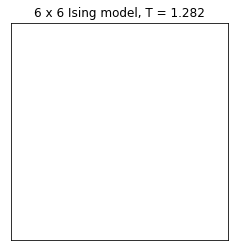

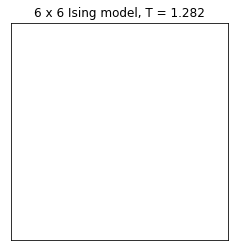

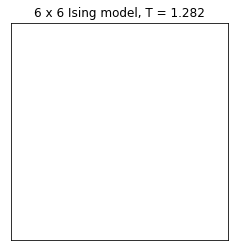

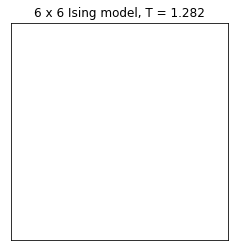

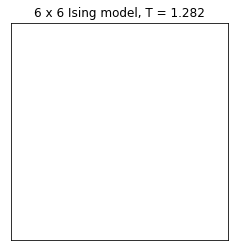

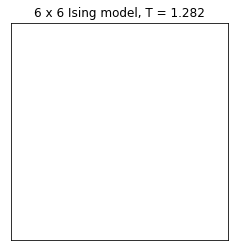

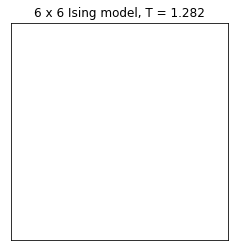

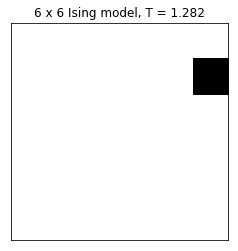

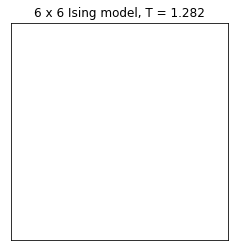

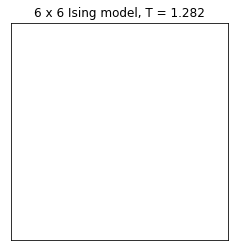

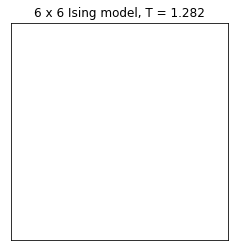

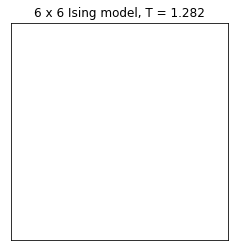

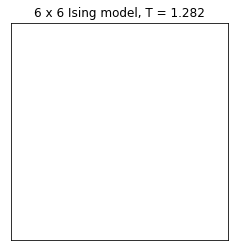

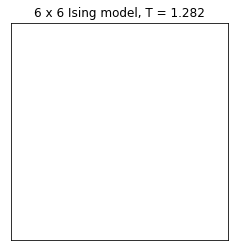

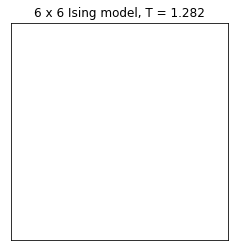

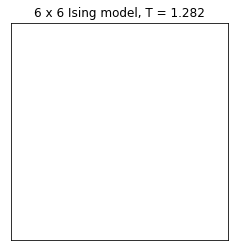

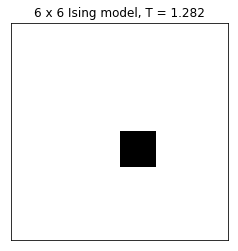

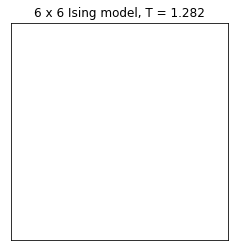

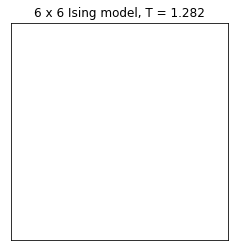

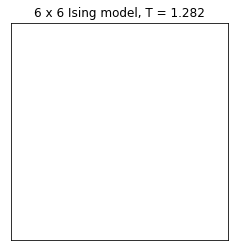

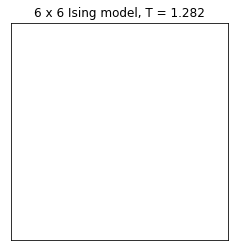

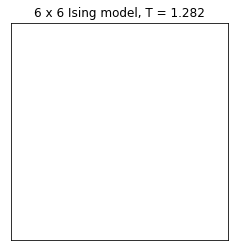

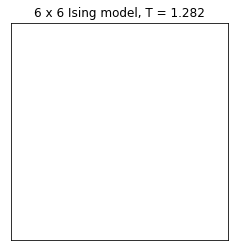

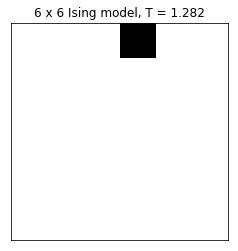

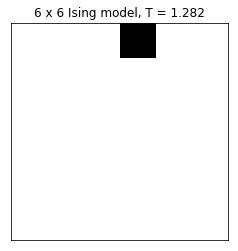

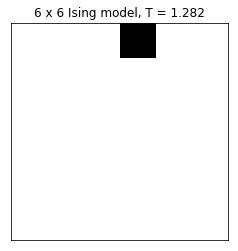

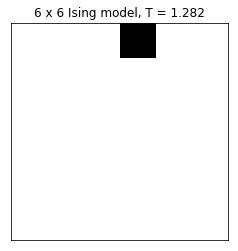

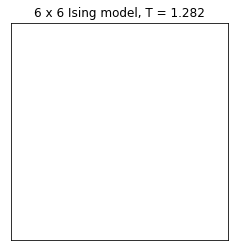

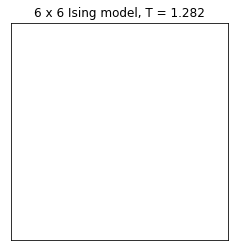

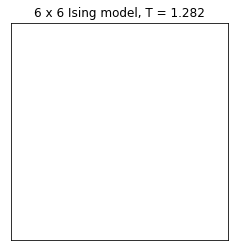

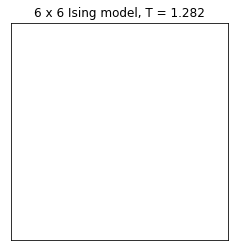


T = 1.000000


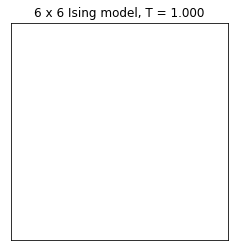

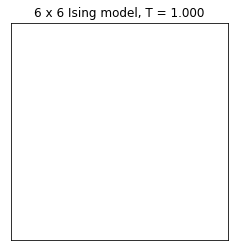

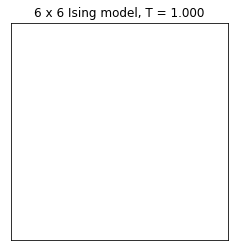

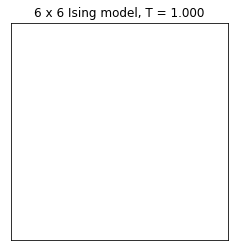

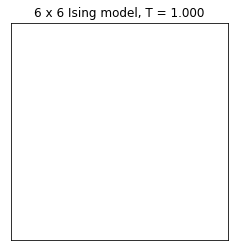

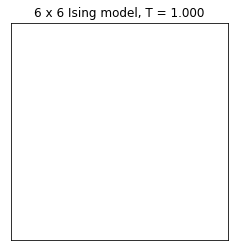

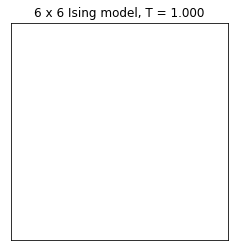

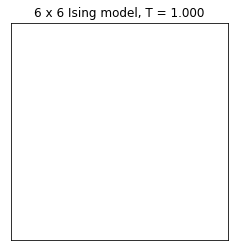

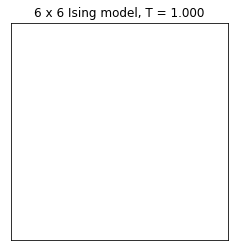

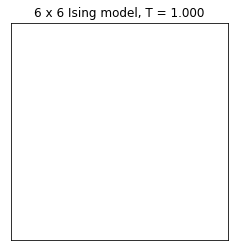

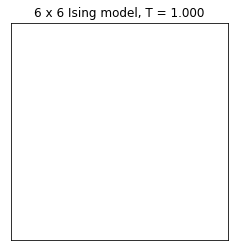

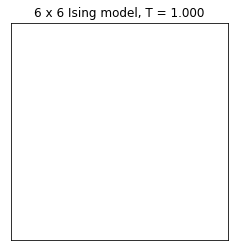

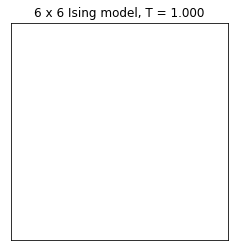

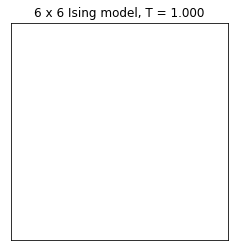

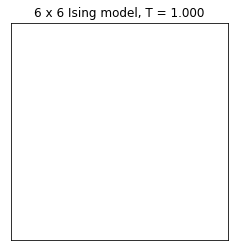

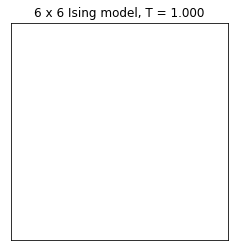

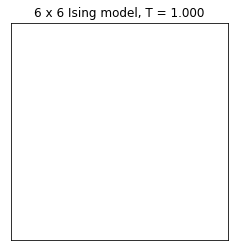

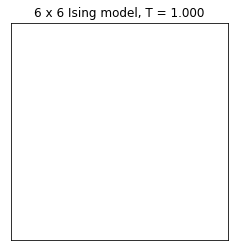

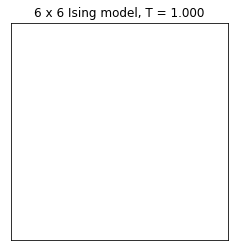

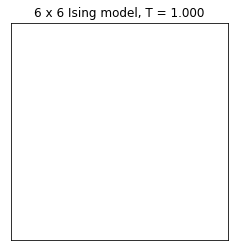

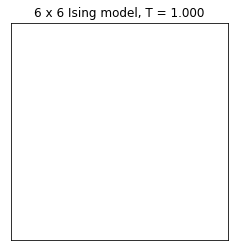

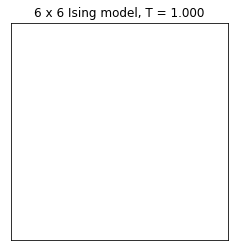

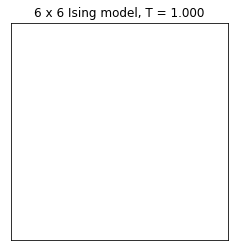

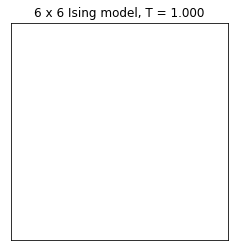

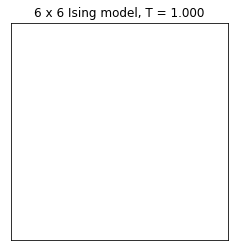

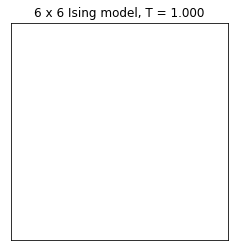

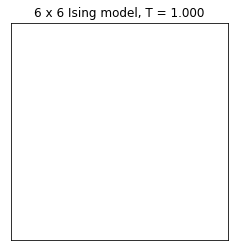

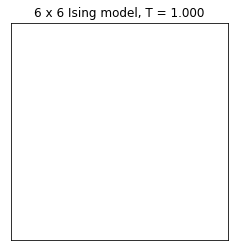

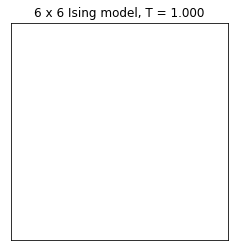

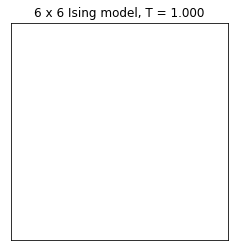

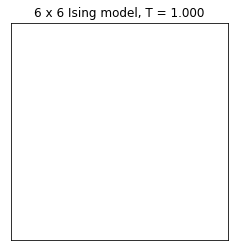

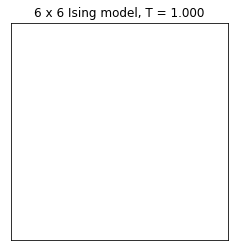

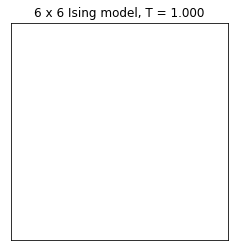

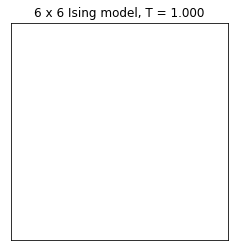

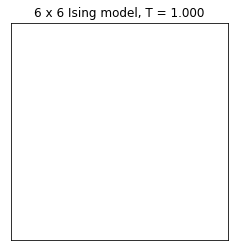

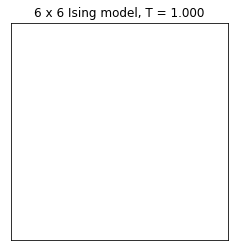

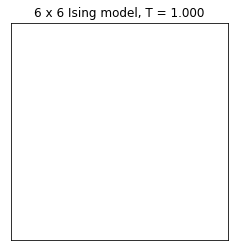

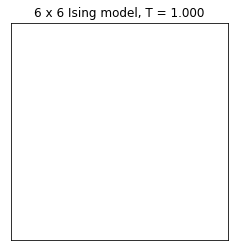

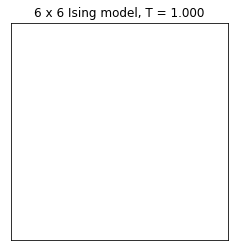

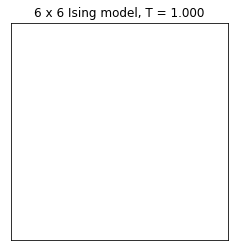

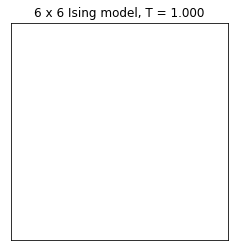

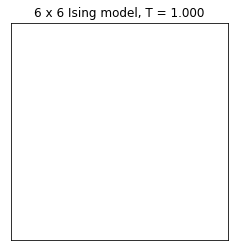

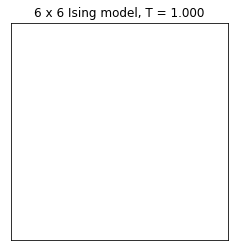

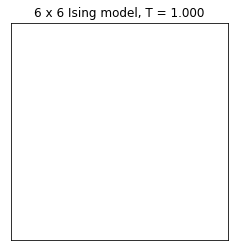

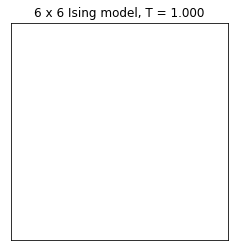

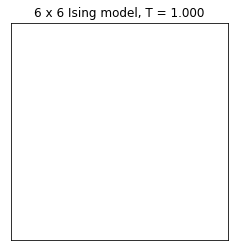

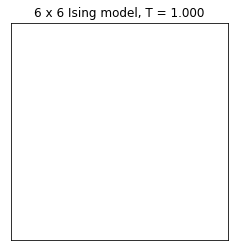

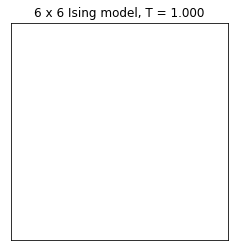

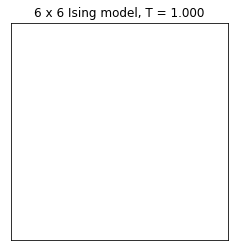

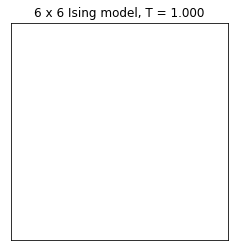

Elapsed time: 33.996703 seconds


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:128: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [5]:
# Monte Carlo Sampling
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import os
import random
import time

### Input parameters: ###
num_T = 10
T_array = np.linspace(3.538,1,num_T) #temperature list (half above and half below Tc)
L = 6                            #linear size of the lattice
N_spins = L**2                   #total number of spins
J = 1                            #coupling parameter

### Critical temperature: ###
Tc = 2.0/np.log(1.0 + np.sqrt(2))*J

### Monte Carlo parameters: ###
n_eqSweeps = 100   #number of equilibration sweeps (configurations that are not used since we are not yet sampling the correct dist.)
n_measSweeps = 50  #number of measurement sweeps per temperature

### Files to write spin configurations (x), labels (y), and temperatures (T): ###
file_x = open('x_L%d.txt' %L, 'w')
file_y = open('y_L%d.txt' %L, 'w')
file_T = open('T_L%d.txt' %L, 'w')

### Parameters needed to show animation of spin configurations: ###
animate = True
bw_cmap = colors.ListedColormap(['black', 'white'])

### Initially, the spins are in a random state (a high-T phase): ###
spins = np.zeros(N_spins,dtype=np.int)
for i in range(N_spins):
  spins[i] = 2*random.randint(0,1) - 1 #either +1 or -1

### Store each spin's four nearest neighbours in a neighbours array (using periodic boundary conditions): ###
neighbours = np.zeros((N_spins,4),dtype=np.int)
for i in range(N_spins):
  #neighbour to the right:
  neighbours[i,0]=i+1
  if i%L==(L-1):
    neighbours[i,0]=i+1-L
  
  #upwards neighbour:
  neighbours[i,1]=i+L
  if i >= (N_spins-L):
    neighbours[i,1]=i+L-N_spins

  #neighbour to the left:
  neighbours[i,2]=i-1
  if i%L==0:
    neighbours[i,2]=i-1+L

  #downwards neighbour:
  neighbours[i,3]=i-L
  if i <= (L-1):
    neighbours[i,3]=i-L+N_spins
#end of for loop

### Function to perform one Monte Carlo sweep ###
def sweep():
  #do one sweep (N_spins single-spin updates):
  for i in range(N_spins):
    site = random.randint(0,N_spins-1) #randomly choose which spin to consider flipping
    
    #calculate the change in energy for the proposed move:
    deltaE = 0
    #calculate the change in energy of the proposed move by considering only the nearest neighbours:
    for j in range(4):
      deltaE += 2*J*spins[site]*spins[neighbours[site,j]]
  
    if (deltaE <= 0) or (random.random() < np.exp(-deltaE/T)):
      #flip the spin:
      spins[site] = -spins[site]
  #end loop over i
#end of sweep() function

### Function to write the training/testing data to file: ###
def writeConfigs(spins,T):
  #write each spin config. to a single line of the x data file:
  file_x.writelines(["%d " %item  for item in spins])
  file_x.write('\n')
  
  #write the labels to file:
  y = 0
  if T>Tc:
    y = 1
  file_y.write('%d \n' %y)

  #write the temperatures to file:
  file_T.write('%f \n' %T)
#end of writeConfigs(num,T) function

#################################################################################
########## Loop over all temperatures and perform Monte Carlo updates: ##########
#################################################################################
t1 = time.clock() #for timing
for T in T_array:
  print('\nT = %f' %T)
  
  #equilibration sweeps (don't use these states since we are not yet sampling the correct dist.):
  for i in range(n_eqSweeps):
    sweep()

  #start doing measurements:
  for i in range(n_measSweeps):
    sweep()
    
    #write the data to file:
    writeConfigs(spins,T)

    if animate:
      #Display the current spin configuration:
      plt.clf()
      plt.imshow( spins.reshape((L,L)), cmap=bw_cmap, norm=colors.BoundaryNorm([-1,0,1], bw_cmap.N), interpolation='None' )
      plt.title('%d x %d Ising model, T = %.3f' %(L,L,T))
      plt.xticks([])
      plt.yticks([])
      plt.pause(0.01)
    #end if

    if (i+1)%100==0:
      print('  %d sweeps complete' %(i+1))
  #end loop over i

#end loop over temperature

t2 = time.clock()
print('Elapsed time: %f seconds' %(t2-t1))

In [6]:
configs = np.loadtxt('x_L6.txt',dtype='uint8')

ValueError: Wrong number of columns at line 402